### Activate power control

$$ SIR = \frac{P_r}{\sum P_{ri}} = \frac{P_t L \chi}{\sum P_{ti} L_i \chi_i}$$
Si tenemos power control,
$$ P_t = \frac{P}{G(d)^\eta}, \hspace{5px} \eta \in [0, 1] $$
Sustituimos:
$$ SIR =
\frac{\frac{P}{G(d)^\eta} L \chi}{\sum \frac{P}{G(d)_i^\eta} L_i \chi_i} =
\frac{\frac{P}{(L \chi)^\eta} L \chi}{\sum \frac{P}{(L'_i \chi'_i)^\eta} L_i \chi_i} =
\frac{\frac{L \chi}{(L \chi)^\eta} }{\sum \frac{L_i \chi_i}{(L'_i \chi'_i)^\eta} }
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def x_cartesian(v_hex, u_hex, D = 1):
    return D * v_hex * np.cos(np.radians(30))

def y_cartesian(v_hex, u_hex, D = 1):
    return D * u_hex + D * v_hex * 0.5

def v_hex(x, y, D = 1):
    return round(x / (D * np.cos(np.radians(30))))

def u_hex(x, y, D = 1):
    return round((y - D * v_hex(x, y, D) * 0.5) / D)

In [4]:
# hex parameters
height = 1000  # height of hex
radius = height / np.sqrt(3)  # radius of hex based on height

# Define hexagonal coordinates for two cells, placed vertically adjacent
hex_positions = [[0,0], [0,1], [1,1], [0,2], [1,0], [2,0], [-1, 1], [-1, -1], [1, -1], [0, -1], [0, -2], [1, -2], [2, -2], [2, -1], [-1, 0], [-1, 2], [-2, 0], [-2, 1], [-2, 2]]
hex_positions = [(x_cartesian(c[0], c[1], height), y_cartesian(c[0], c[1], height)) for c in hex_positions]

In [5]:
# Function to calculate which sector a point belongs to
def calculate_sector(x, y, center_x, center_y):
    angle = np.arctan2(y - center_y, x - center_x) * 180 / np.pi  # Convert to degrees
    angle = (angle + 360) % 360  # Normalize to 0–360°
    if 0 <= angle < 120:
        return 0  # Sector 1
    elif 120 <= angle < 240:
        return 1  # Sector 2
    else:
        return 2  # Sector 3


# Function to generate random points inside hexagonal areas
def is_point_in_hexagon(x, y, center_x, center_y, radius):
    angles = np.linspace(0, 2 * np.pi, 7)
    x_hex = center_x + radius * np.cos(angles)
    y_hex = center_y + radius * np.sin(angles)
    hex_path = plt.Polygon(list(zip(x_hex, y_hex)))
    return hex_path.contains_point((x, y))


  # Generate random points
def generate_n_random_points_in_hexagons(hex_positions, radius, height, num_points=1):
    points = []
    for center_x, center_y in hex_positions:
        curr = 0
        min_x = center_x - radius
        max_x = center_x + radius
        min_y = center_y - height / 2
        max_y = center_y + height / 2

        sector_users = {0: [], 1: [], 2: []}
        while (len(sector_users[0]) < num_points) or (len(sector_users[1]) < num_points) or (len(sector_users[2]) < num_points):
            random_x = np.random.uniform(min_x, max_x, 1)
            random_y = np.random.uniform(min_y, max_y, 1)

            if is_point_in_hexagon(random_x, random_y, center_x, center_y, radius):
                sector = calculate_sector(random_x, random_y, center_x, center_y)
                if (len(sector_users[sector]) < num_points):
                    sector_users[sector].append((random_x, random_y))
                    points.append((random_x, random_y, center_x, center_y))
                    curr += 1
    return points

##ction to plot a hexagon
def plot_hexagon(ax, center_x, center_y, radius, color='black'):
    angles = np.linspace(0, 2 * np.pi, 7)
    x_hex = center_x + radius * np.cos(angles)
    y_hex = center_y + radius * np.sin(angles)
    ax.plot(x_hex, y_hex, color=color)
    ax.fill(x_hex, y_hex, color=color, alpha=0.1)

# Function to plot a cell with 3 sectors
def plot_cell_with_sectors(ax, center_x, center_y, radius):
    # Draw the cell's hexagonal boundary
    plot_hexagon(ax, center_x, center_y, radius)

    # Draw the 3 sectors within each cell (120° each)
    for i in range(3):
        angle = i * (2 * np.pi / 3)  # Starting angle for each sector
        x_sector = [center_x, center_x + radius * np.cos(angle)]
        y_sector = [center_y, center_y + radius * np.sin(angle)]
        ax.plot(x_sector, y_sector, color='gray', linestyle='--')

Pathloss to center: [2.12015173e-11], Pathloss to Antenna: [2.12015173e-11]
Pathloss to center: [1.0067161e-08], Pathloss to Antenna: [1.0067161e-08]
Pathloss to center: [7.03310768e-10], Pathloss to Antenna: [7.03310768e-10]
Pathloss to center: [8.35653615e-13], Pathloss to Antenna: [1.63571314e-09]
Pathloss to center: [7.18128529e-12], Pathloss to Antenna: [8.307765e-11]
Pathloss to center: [1.51338245e-13], Pathloss to Antenna: [3.79379853e-08]
Pathloss to center: [3.00821628e-13], Pathloss to Antenna: [2.20359929e-10]
Pathloss to center: [5.04180578e-14], Pathloss to Antenna: [6.38591736e-11]
Pathloss to center: [7.8221973e-13], Pathloss to Antenna: [5.55206368e-10]
Pathloss to center: [1.0883346e-13], Pathloss to Antenna: [5.76296455e-10]
Pathloss to center: [6.14421674e-14], Pathloss to Antenna: [2.87612533e-07]
Pathloss to center: [1.01690622e-13], Pathloss to Antenna: [1.66717874e-09]
Pathloss to center: [6.3099079e-11], Pathloss to Antenna: [2.99172947e-08]
Pathloss to center:

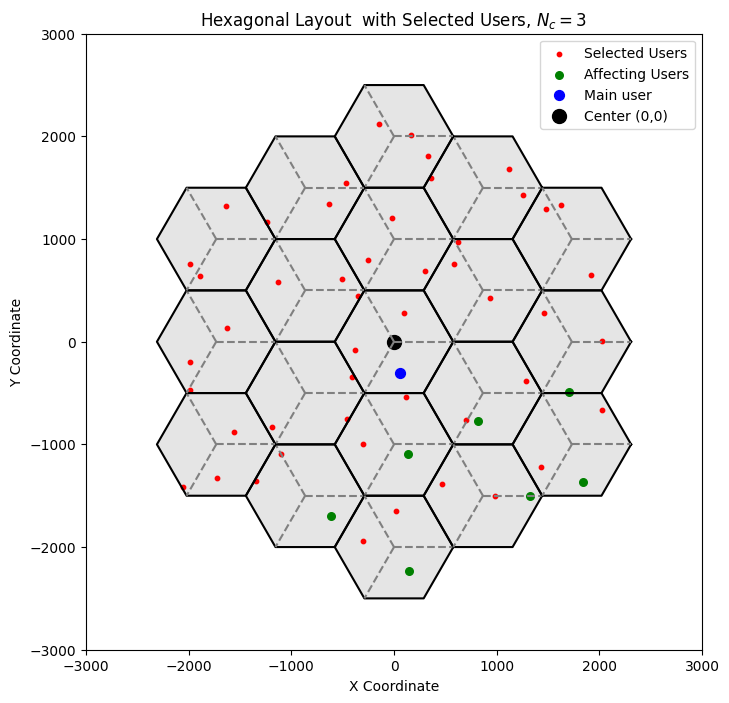

In [6]:
# Generate random points
nu = 3.8
alpha = 1
sigma = 8

default_power = 10 ** (-6)
power_exponent = 0.95

users = generate_n_random_points_in_hexagons(hex_positions, radius, height)
distances_to_center = [10 * np.log10(np.sqrt((x - 0)**2 + (y - 0)**2)) for x, y, _, _ in users]
pathloss = [alpha - nu * d for d in distances_to_center] # in dB so subtracting instead of divide
pathloss_shadowing = [p + np.random.normal(0, sigma) for p in pathloss] # Combining pathloss and Shadowing : Lp * X
linear_ps  = [10 ** (p/10) for p in pathloss_shadowing]

# Generate the pathloss
distances_to_antenna = [10 * np.log10(np.sqrt((x - x_center)**2 + (y - y_center)**2)) for x, y, x_center, y_center in users]
pathloss_to_antenna = [alpha - nu * d for d in distances_to_antenna] # in dB so subtracting instead of divide
pathloss_shadowing_antenna  = [np.random.normal(p, sigma) for p in pathloss_to_antenna] # Combining pathloss and Shadowing : Lp * X
linear_ps_antenna = [10 ** (p/10) for p in pathloss_shadowing_antenna]


# for x, y, x_center, y_center in users:
#     print(f"Distance to center: {np.sqrt((x - 0)**2 + (y - 0)**2)}, Distance to Antenna: {np.sqrt((x - x_center)**2 + (y - y_center)**2)}")
for i in range(3):
    linear_ps[i] = linear_ps_antenna[i]

for i in range(len(distances_to_antenna)):
    print(f"Pathloss to center: {linear_ps[i]}, Pathloss to Antenna: {linear_ps_antenna[i]}")

# Divide by the pathloss and shadowing to its corresponding antenna
curr = linear_ps[0][0] / (linear_ps[0][0] ** power_exponent)
curr_sector = calculate_sector(users[0][0][0], users[0][1][0], users[0][2], users[0][3])
interference = 0
affecting_users = []
for i in range(1, len(linear_ps)):
    directivity_side = calculate_sector(users[i][0][0], users[i][1][0], users[0][2], users[0][3]) == curr_sector
    same_sector = calculate_sector(users[i][0][0], users[i][1][0], users[i][2], users[i][3]) == curr_sector
    if directivity_side and same_sector:
        # print(f"linear_ps[i][0]: {linear_ps[i][0]}, linear_ps_antenna[i] ** power_exponent = {linear_ps_antenna[i] ** power_exponent}, linear_ps[i][0] / (linear_ps_antenna[i] ** power_exponent) = {linear_ps[i][0] / (linear_ps_antenna[i] ** power_exponent)}")
        interference += linear_ps[i][0] / (linear_ps_antenna[i] ** power_exponent)
        affecting_users.append((users[i][0][0], users[i][1][0]))

print(curr)
SIR = curr / interference
print(f"SIR = {SIR}")

# Visualization
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_title("Hexagonal Layout  with Selected Users, $N_c = 3$")

# Plot each cell at the specified hexagonal coordinates
for (x, y) in hex_positions:
    plot_cell_with_sectors(ax, x, y, radius)



# Plot selected users
x_users, y_users, _, _ = zip(*users)
x_affusers, y_affusers = zip(*affecting_users)
ax.scatter(x_users, y_users, color='red', s=10, label="Selected Users")
ax.scatter(x_affusers, y_affusers, color='green', s=30, label="Affecting Users")
ax.scatter(users[0][0][0], users[0][1][0], color='blue', s=50, label="Main user")

# Highlight the central point
ax.scatter([0], [0], color='black', s=100, label='Center (0,0)')

plt.xlim(height * -3, height * 3)
plt.ylim(height * -3, height * 3)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(False)
plt.show()

In [8]:
N = 500
nu = 3.8
alpha = 113
sigma = 8 # standard dev used in the normalized distribution of shadowing
power_exponent = 1

SIRs_og = []



for exp in np.arange(0.0, 1.1, 0.1):
    SIRl = []
    for i in range(N):
        # Generate random points
        users = generate_n_random_points_in_hexagons(hex_positions, radius, height)

        # Calculate distances to center (0, 0)
        distances_to_center = [10 * np.log10(np.sqrt((x - 0)**2 + (y - 0)**2)) for x, y, _, _ in users]
        pathloss = [alpha - nu * d for d in distances_to_center] # in dB so subtracting instead of divide
        pathloss_shadowing = [np.random.normal(p, sigma) for p in pathloss] # Combining pathloss and Shadowing : Lp * X
        linear_ps  = [10 ** (p/10) for p in pathloss_shadowing]

        # Calculate distances to respective centers
        distances_to_antenna = [10 * np.log10(np.sqrt((x - x_center)**2 + (y - y_center)**2)) for x, y, x_center, y_center in users]
        pathloss_to_antenna = [alpha - nu * d for d in distances_to_antenna] # in dB so subtracting instead of divide
        pathloss_shadowing_antenna  = [np.random.normal(p, sigma) for p in pathloss_to_antenna] # Combining pathloss and Shadowing : Lp * X
        linear_ps_antenna = [10 ** (p/10) for p in pathloss_shadowing_antenna]

        for i in range(3):
            linear_ps[i] = linear_ps_antenna[i]

        # Divide by the pathloss and shadowing to its corresponding antenna
        curr = linear_ps[0][0] / (linear_ps_antenna[0][0] ** exp)
        curr_sector = calculate_sector(users[0][0][0], users[0][1][0], users[0][2], users[0][3])
        interference = 0
        for i in range(1, len(linear_ps)):
            directivity_side = calculate_sector(users[i][0][0], users[i][1][0], users[0][2], users[0][3]) == curr_sector
            same_sector = calculate_sector(users[i][0][0], users[i][1][0], users[i][2], users[i][3]) == curr_sector
            if (directivity_side) and (same_sector):
                # Divide by the pathloss and shadowing to its corresponding antenna
                interference += linear_ps[i][0] / (linear_ps_antenna[i] ** exp)

        SIR = curr / interference
        SIRl.append(SIR)
    SIRs_og.append(SIRl)


0 - 1, steps of 0.1

C:\Users\kiragoro\AppData\Local\Temp\ipykernel_15868\698135922.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('viridis')  # Choose a colormap


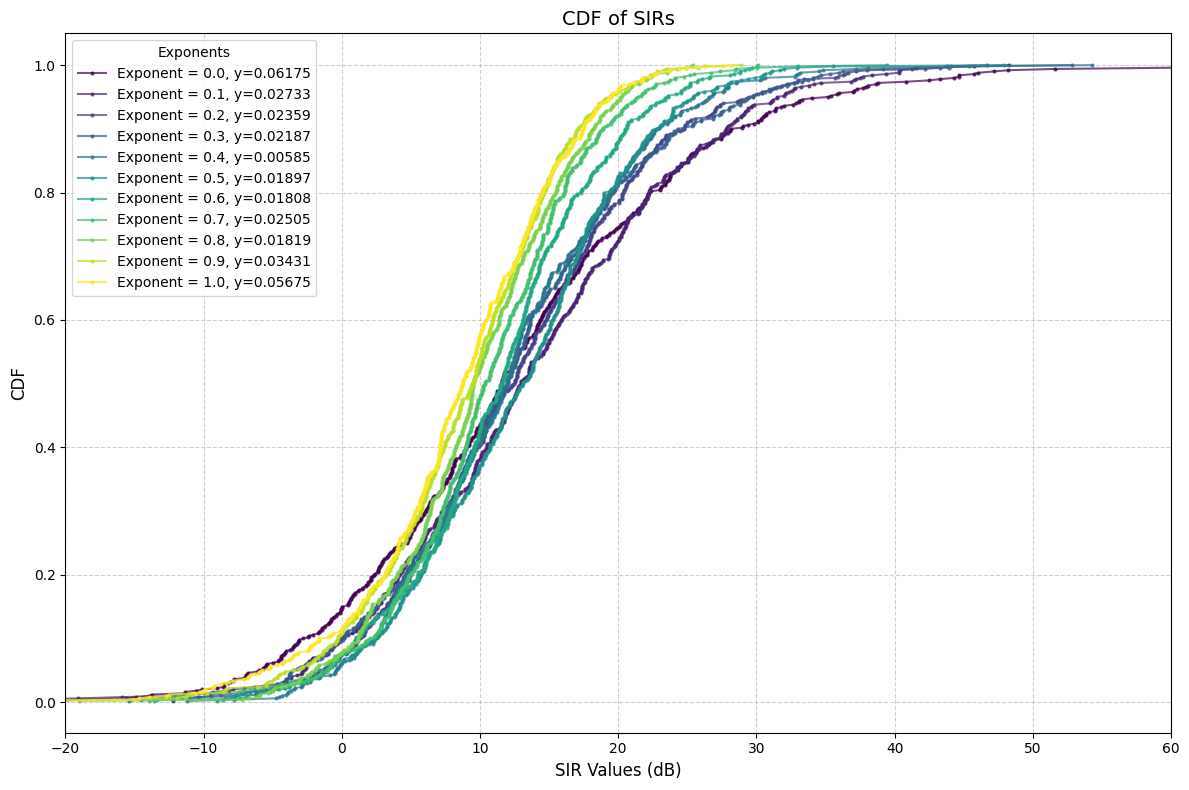

In [11]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

SIRs = SIRs_og.copy()

# Create a single figure
plt.figure(figsize=(12, 8))

# Define a colormap and normalize
colormap = cm.get_cmap('viridis')  # Choose a colormap
norm = mcolors.Normalize(vmin=0, vmax=len(SIRs) - 1)  # Normalize indices to colormap range

# Plot each SIR CDF on the same axes with a color scale
for i, SIRs in enumerate(SIRs):
    # Step 1: Convert to dB and sort
    SIRs_DB = np.array([10 * np.log10(SIR) for SIR in SIRs if SIR > 0])  # Avoid log of zero
    SIRs_DB = SIRs_DB.ravel()
    sorted_data = np.sort(SIRs_DB)

    # Step 2: Calculate cumulative probabilities
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Step 3: Get color from colormap
    color = colormap(norm(i))

    # Step 5: Annotate the y-value where x = -5
    if -5 in sorted_data:
        y_value = cdf[np.where(sorted_data == -5)[0][0]]
    else:
        # Interpolate y-value if -5 is not exactly in sorted_data
        y_value = np.interp(-5, sorted_data, cdf)

    # Step 4: Plot on the same figure
    plt.plot(sorted_data, cdf, marker='o', linestyle='-', label=f'Exponent = {(0 + i*0.1):.3}, y={y_value:.5f}', alpha=0.7, markersize=2, color=color)



# Add title, labels, grid, and legend
plt.title('CDF of SIRs', fontsize=14)
plt.xlabel('SIR Values (dB)', fontsize=12)
plt.ylabel('CDF', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Exponents', fontsize=10)

# Set x-axis range
plt.xlim(-20, 60)

# Show the plot
plt.tight_layout()
plt.show()


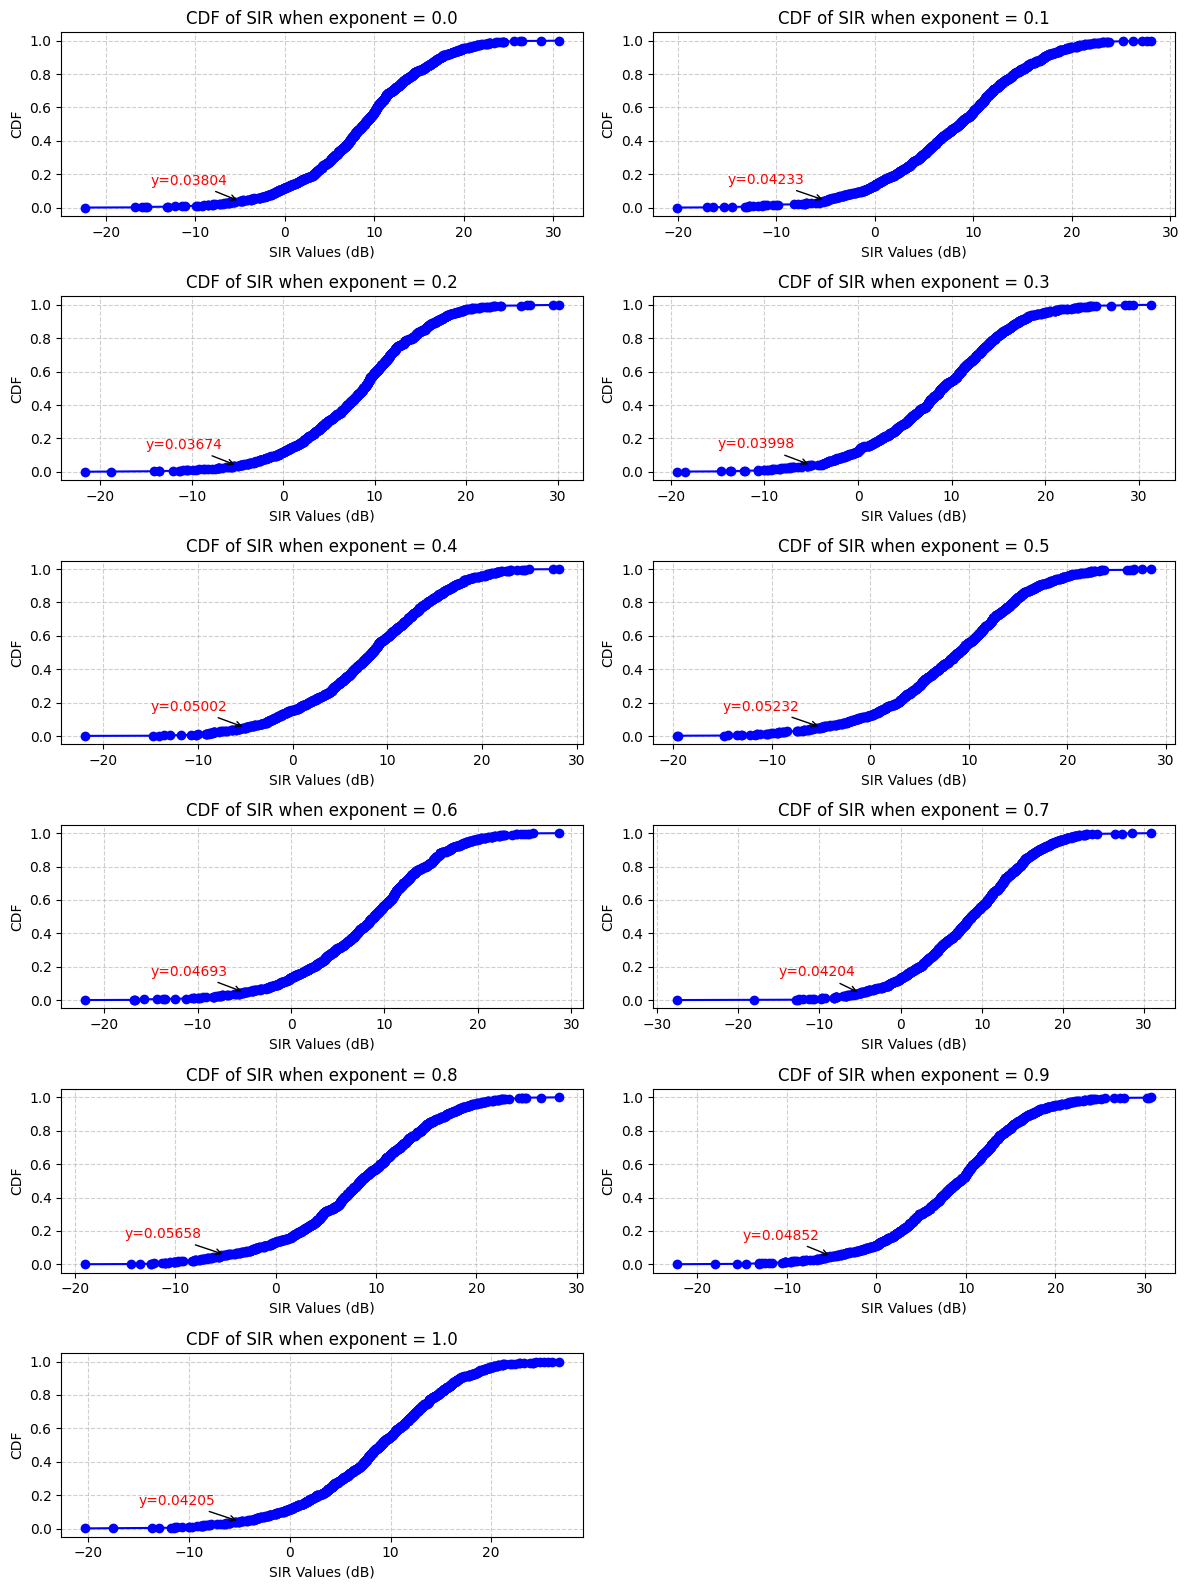

In [ ]:
# Create a figure and subplots
n = len(SIRs)  # Number of graphs to plot
rows = int(np.ceil(n / 2))  # Arrange in 2 columns (adjust as needed)
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(12, 16))

# Flatten axes for easier iteration (handles cases where n is not a perfect square)
axes = axes.flatten()

# Plot each SIR CDF on a different subplot
for i, SIRs in enumerate(SIRs):
    # Step 1: Convert to dB and sort
    SIRs_DB = np.array([10 * np.log10(SIR) for SIR in SIRs if SIR > 0])  # Avoid log of zero
    SIRs_DB = SIRs_DB.ravel()
    sorted_data = np.sort(SIRs_DB)

    # Step 2: Calculate cumulative probabilities
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Step 3: Plot on the corresponding subplot
    axes[i].plot(sorted_data, cdf, marker='o', linestyle='-', color='blue')
    axes[i].set_title(f'CDF of SIR when exponent = {i/10.}', fontsize=12)
    axes[i].set_xlabel('SIR Values (dB)', fontsize=10)
    axes[i].set_ylabel('CDF', fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.6)

    # Step 4: Annotate the y-value where x = -5
    if -5 in sorted_data:
        y_value = cdf[np.where(sorted_data == -5)[0][0]]
    else:
        # Interpolate y-value if -5 is not exactly in sorted_data
        y_value = np.interp(-5, sorted_data, cdf)

    # Add annotation
    axes[i].annotate(f'y={y_value:.5f}', xy=(-5, y_value), xytext=(-15, y_value + 0.1),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     fontsize=10, color='red')

# Turn off unused subplots if n is not a perfect square
for j in range(n, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

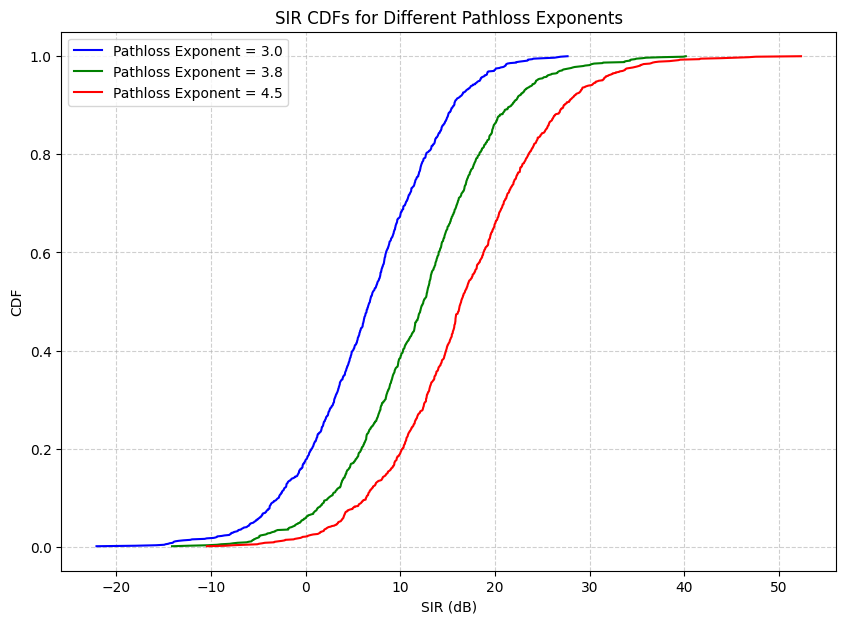

In [ ]:
# Re-addressing the analysis for different pathloss exponents
N = 1000  # Number of iterations for simulation
nus = [3.0, 3.8, 4.5]  # Pathloss exponents to compare
sigma = 8  # Shadowing standard deviation
power_exponent = 0.5  # Power control exponent
alpha = 113

SIR_results = {}

for nu in nus:
    SIRs = []
    for _ in range(N):
        # Generate random points
        users = generate_n_random_points_in_hexagons(hex_positions, radius, height)

        # Calculate pathloss for each user
        distances_to_center = [10 * np.log10(np.sqrt((x - 0)**2 + (y - 0)**2)) for x, y, _, _ in users]
        pathloss = [alpha - nu * d for d in distances_to_center]  # Pathloss in dB
        pathloss_shadowing = [np.random.normal(p, sigma) for p in pathloss]  # Add shadowing
        linear_ps = [10 ** (p / 10) for p in pathloss_shadowing]  # Convert to linear scale

        distances_to_antenna = [10 * np.log10(np.sqrt((x - x_center)**2 + (y - y_center)**2)) for x, y, x_center, y_center in users]
        pathloss_to_antenna = [alpha - nu * d for d in distances_to_antenna]
        pathloss_shadowing_antenna = [np.random.normal(p, sigma) for p in pathloss_to_antenna]
        linear_ps_antenna = [10 ** (p / 10) for p in pathloss_shadowing_antenna]

        # Calculate SIR for the first user
        curr = linear_ps[0] / (linear_ps[0] ** power_exponent)
        curr_sector = calculate_sector(users[0][0], users[0][1], users[0][2], users[0][3])
        interference = 0

        for i in range(1, len(linear_ps)):
            directivity_side = calculate_sector(users[i][0], users[i][1], users[0][2], users[0][3]) == curr_sector
            same_sector = calculate_sector(users[i][0], users[i][1], users[i][2], users[i][3]) == curr_sector
            if directivity_side and same_sector:
                interference += linear_ps[i] / (linear_ps_antenna[i] ** power_exponent)

        SIR = curr / interference if interference > 0 else 0
        SIRs.append(SIR)

    SIR_results[nu] = np.array(SIRs)

# Plot the CDFs for different pathloss exponents
plt.figure(figsize=(10, 7))
colors = ['blue', 'green', 'red']

for nu, color in zip(alphas, colors):
    SIRs_DB = 10 * np.log10(SIR_results[nu][SIR_results[nu] > 0])  # Convert to dB, remove zeros
    sorted_data = np.sort(SIRs_DB)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf, label=f'Pathloss Exponent = {nu}', color=color)

plt.title('SIR CDFs for Different Pathloss Exponents')
plt.xlabel('SIR (dB)')
plt.ylabel('CDF')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()